In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full.shape

(60000, 28, 28)

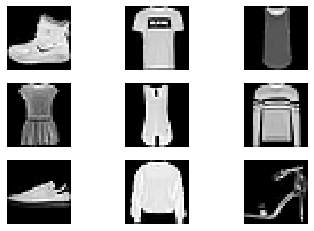

In [11]:
plt.figure()
for k in range(9):
    plt.subplot(3,3,k+1)
    plt.imshow(X_train_full[k], cmap="gray")
    plt.axis('off')
plt.show()

In [12]:
X_valid = (X_train_full[:5000] / 255.0) - 0.5
X_train = (X_train_full[5000:] / 255.0) - 0.5
X_test = (X_test / 255.0) - 0.5

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [20]:
from functools import partial

dense_layer = partial(tf.keras.layers.Dense, activation=None, kernel_regularizer=tf.keras.regularizers.l2(0.0001))
lrelu = tf.keras.layers.LeakyReLU(alpha=0.1)
bn = tf.keras.layers.BatchNormalization()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    dense_layer(1024),
    lrelu,
    bn,
    dense_layer(512),
    lrelu,
    tf.keras.layers.BatchNormalization(),
    dense_layer(256),
    lrelu,
    tf.keras.layers.BatchNormalization(),
    dense_layer(10, activation="softmax")
])

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=["accuracy"])

In [22]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 46s 828us/sample - loss: 0.6633 - accuracy: 0.8336 - val_loss: 0.5714 - val_accuracy: 0.8658
Epoch 2/10
55000/55000 [==============================] - 43s 780us/sample - loss: 0.5432 - accuracy: 0.8716 - val_loss: 0.5154 - val_accuracy: 0.8818
Epoch 3/10
55000/55000 [==============================] - 43s 786us/sample - loss: 0.4979 - accuracy: 0.8871 - val_loss: 0.4979 - val_accuracy: 0.8866
Epoch 4/10
55000/55000 [==============================] - 43s 779us/sample - loss: 0.4740 - accuracy: 0.8925 - val_loss: 0.4883 - val_accuracy: 0.8872
Epoch 5/10
55000/55000 [==============================] - 44s 799us/sample - loss: 0.4478 - accuracy: 0.9037 - val_loss: 0.4824 - val_accuracy: 0.8910
Epoch 6/10
55000/55000 [==============================] - 41s 751us/sample - loss: 0.4296 - accuracy: 0.9078 - val_loss: 0.4793 - val_accuracy: 0.8864
Epoch 7/10
55000/55000 [=====================

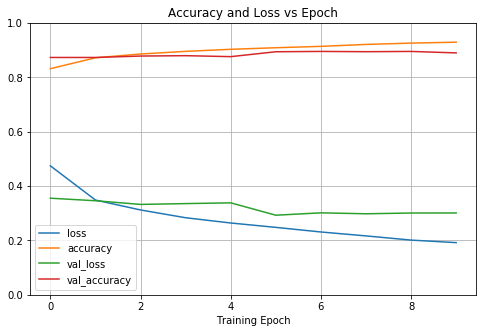

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Training Epoch')
plt.title('Accuracy and Loss vs Epoch')
#plt.show()
plt.savefig('acc-p1.png')

In [19]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 196us/sample - loss: 0.3323 - accuracy: 0.8831


[0.3323250204503536, 0.8831]

In [225]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[859   1  11  26   4   3  81   0  15   0]
 [  2 977   1  15   1   0   3   0   1   0]
 [ 15   0 836   9  80   0  59   0   1   0]
 [ 23   4   6 919  17   0  21   0   9   1]
 [  1   0  87  40 797   0  72   0   3   0]
 [  1   0   0   1   0 959   0  26   2  11]
 [129   0  94  27  46   0 691   0  13   0]
 [  0   0   0   0   0   8   0 956   0  36]
 [  2   0   5   3   3   1   3   4 979   0]
 [  1   0   0   0   0   6   0  23   0 970]]


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 430032077784650135
]


In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0
